In [47]:
import pathlib
import urllib
import sys
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, iqr, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Collect data

In [48]:
path = pathlib.Path('../data/adult.csv')
if path.exists():
    print('adult dataset found!')
else:
    sys.stdout.write('Downloading the adult dataset from the Internet...')
    ADULTURL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    urllib.request.urlretrieve(ADULTURL, path.absolute())
    sys.stdout.write('Done!')

adult dataset found!


# 2. Understand the data in context


In [49]:
# Load the adult dataset into a Pandas dataframe
adult_columns = ['age', 'workclass', 'fnlwgt', 'education', 'eduNum', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'gain', 'loss', 'hours-per-week', 'native-country', 'income']
adult = pd.read_csv(path.absolute(),names=adult_columns)
adult['sex'] = adult['sex'].str.strip()
adult['relationship'] = adult['relationship'].str.strip()
adult['income'] = adult['income'].str.strip()

# 3. Understand the data
### 3.1 Describe the meansing and type for each attribute
 - **age**: numeric, continuous. 
 - **workclass**: categorical, discrete.
 - **fnlwgt**: numeric, continuous
 - **education**: categorical, discrete
 - **education-num**: numeric, continuous
 - **marital-status**: categorical, discrete
 - **occupation**: categorical, discrete
 - **relationship**: categorical, discrete
 - **race**: categorical, discrete
 - **sex**: categorical, binary
 - **capital-gain**: numeric, continuous
 - **capital-loss**: numeric, continuous
 - **hours-per-week**: numeric, continuous
 - **native-country**: categorical, discrete
 - **>50k**: categorical, binary

*3.1 subsection: explanation for non-self-explanatory attributes*
 - **fnlwgt**: represents final weight. according to [2], it's the number of units that this record could represent in the 
 target population. In [1], the author explained that the final weight is controlled by three factors: a single cell estimatation
 of the population 16+ for each state; controls for Hispanic Origin by age and sex; controls by race, age and sex.
 - **education_num**: represents the number of years of education in total.[2]
 - **relationship**: represents the individual's role in it's family.[2]
 - **capital_gain** and **capital_loss**: represents the income and loss from non-salary ways, e.g. investment.[2]
 
 
### 3.2 Verify data quality
#### 3.2.1 duplication

In [50]:
# Check duplication and drop duplication via pandas built in function
check_duplication = adult.duplicated()
duplicated = adult[check_duplication]
print("There are "+str(len(duplicated.index))+" duplicated data entries found.(One copy of the data entry will be kept in the dataset)")
adult = adult.drop_duplicates()
adult = adult.reset_index(drop=True)
print("After drop duplicate, there are "+str(len(adult.index))+ " data entries remains.")

There are 24 duplicated data entries found.(One copy of the data entry will be kept in the dataset)
After drop duplicate, there are 32537 data entries remains.


#### 3.2.2 missing values

In [51]:
# drop the indexes for which column has value '?'
unknown_row =[]

for i in range(len(adult.index)):
    if ('?' in adult.iloc[i]['workclass']) or ('?' in adult.iloc[i]['occupation']) or ('?' in adult.iloc[i]['native-country']):
        unknown_row.append(i)
adult = adult.drop(index = unknown_row)
adult = adult.reset_index(drop=True)
print("After drop missing values, there are "+str(len(adult.index))+ " data entries remains.")

After drop missing values, there are 30139 data entries remains.


In [52]:
# print(set(adult['education']))

In [53]:
#change >50k col to binary values
for i in range(len(adult.index)):
    if '>50K' in adult.iloc[i]['income']:
        adult.iloc[i, adult.columns.get_loc('income')] = 1
    else:
        adult.iloc[i,adult.columns.get_loc('income')] = 0

In [54]:
adult.head(5)

,age,workclass,fnlwgt,education,eduNum,marital-status,occupation,relationship,race,sex,gain,loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### 1. Statistics about Numeric values

In [55]:
# select all columns with numeric values
adult_numeric = adult.select_dtypes(include=np.number)

In [56]:
adult_numeric.head(5)

,age,fnlwgt,eduNum,gain,loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [57]:
cnames = ['mean', 'median', 'mode', 'trimmed mean (p=20%)', 'min', 'max', 'range', 'std']
adult_numeric.agg(lambda x: pd.Series([np.mean(x), np.median(x),x.mode()[0], trim_mean(x, 0.2),x.min(),x.max(),x.max()-x.min(),x.std()], index=cnames))

,age,fnlwgt,eduNum,gain,loss,hours-per-week,income
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703,0.249046
median,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000,0.000000
mode,36.000000,2.034880e+05,9.000000,0.000000,0.000000,40.000000,0.000000
trimmed mean (p=20%),37.364999,1.775251e+05,10.025104,0.000000,0.000000,40.860879,0.081780
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000
range,73.000000,1.470936e+06,15.000000,99999.000000,4356.000000,98.000000,1.000000
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753,0.432468


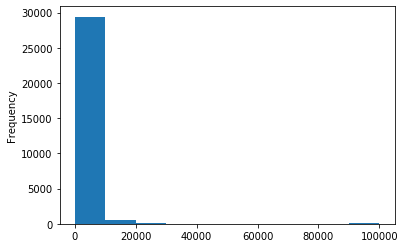

In [58]:
#divide values into bins then plot the counts in each bin
# very good for understanding distribution of values
# easy to compare distributions
# can judge even relatively small differences visually
gain_counts = adult['gain']
gain_counts.plot.hist()

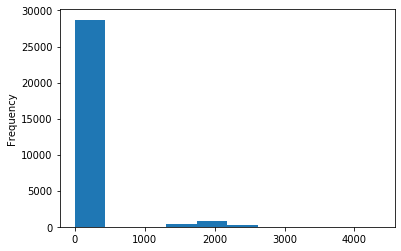

In [59]:
gain_counts = adult['loss']
gain_counts.plot.hist()

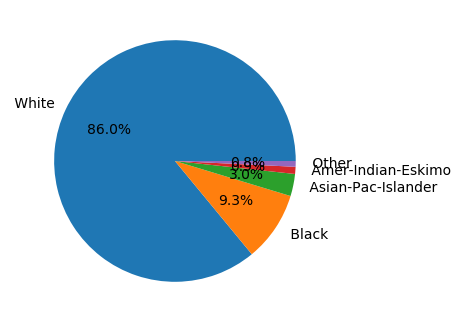

In [60]:
X = adult['race'].value_counts().values
L=adult['race'].value_counts().index
plt.figure(figsize=(6,4), dpi=100)
plt.pie(X, labels=L, autopct = '%1.1f%%')
plt.show()

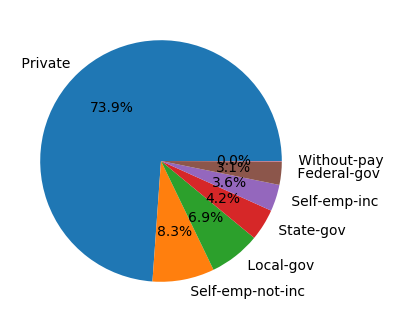

In [61]:
X = adult['workclass'].value_counts().values
L=adult['workclass'].value_counts().index
plt.figure(figsize=(6,4), dpi=100)
plt.pie(X, labels=L, autopct = '%1.1f%%')
plt.show()

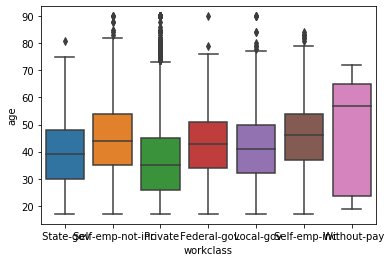

In [62]:
sns.boxplot( x=adult["workclass"], y=adult["age"] )

### 2. Statistics about Categorical values

In [63]:
# select all columns with categorical values
adult_categorical = adult.select_dtypes(include=['object'])

In [64]:
adult_categorical.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [65]:
cnames = adult_categorical.columns.tolist()
cnames

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [66]:
adult_categorical['workclass'].value_counts()

 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [67]:
adult_categorical['education'].value_counts()

 HS-grad         9834
 Some-college    6669
 Bachelors       5042
 Masters         1626
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          556
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          287
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

In [68]:
adult['marital-status'].value_counts()

 Married-civ-spouse       14059
 Never-married             9711
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [69]:
adult_categorical['occupation'].value_counts()

 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3719
 Sales                3584
 Other-service        3209
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [70]:
adult['relationship'].value_counts()

Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [71]:
adult['race'].value_counts()

 White                 25912
 Black                  2816
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [72]:
adult['sex'].value_counts()

Male      20366
Female     9773
Name: sex, dtype: int64

In [73]:
adult['native-country'].value_counts()

 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Columbia                         56
 Poland                           56
 Taiwan                           42
 Iran                             42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [76]:
adult.cov()

,age,fnlwgt,eduNum,gain,loss,hours-per-week,income
age,172.434348,-1.058327e+05,1.445940,7.799171e+03,319.404315,15.941911,1.374393
fnlwgt,-105832.721245,1.116374e+10,-12171.985000,3.288265e+05,-416877.489398,-29152.321019,-410.876170
eduNum,1.445940,-1.217199e+04,6.496068,2.350198e+03,82.066871,4.666373,0.369708
gain,7799.171381,3.288265e+05,2350.197805,5.489492e+07,-96654.004562,7138.205869,708.780740
loss,319.404315,-4.168775e+05,82.066871,-9.665400e+04,163575.951158,253.768690,26.240955
hours-per-week,15.941911,-2.915232e+04,4.666373,7.138206e+03,253.768690,143.490527,1.188570
income,1.374393,-4.108762e+02,0.369708,7.087807e+02,26.240955,1.188570,0.187028


# Reference
[1] Kaggle adult census income dataset. Last access: Sept. 2019. url: https://www.kaggle.com/uciml/adult-census-income
[2] [2] Haojun Zhu, Predicting Earning Potential using the Adult Dataset. Dec. 2016. url: https://rstudio-pubs-static.s3.amazonaws.com/235617_51e06fa6c43b47d1b6daca2523b2f9e4.html

In [89]:
#correlation matrices
adult.corr()

,age,fnlwgt,eduNum,gain,loss,hours-per-week,income
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348,0.242017
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033,-0.008992
eduNum,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842,0.335413
gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429,0.221204
loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380,0.150026
hours-per-week,0.101348,-0.023033,0.152842,0.080429,0.052380,1.000000,0.229435
income,0.242017,-0.008992,0.335413,0.221204,0.150026,0.229435,1.000000


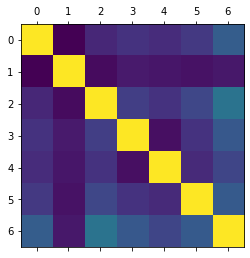

In [90]:
plt.matshow(adult.corr())

In [91]:
adult.groupby('workclass').agg(['mean', lambda x: trim_mean(x, 0.2), 'median', 'std']).T

workclass                    Federal-gov      Local-gov        Private  \
age            mean            42.577943      41.743106      36.798374   
               <lambda_0>      42.433862      41.235294      35.469985   
               median          43.000000      41.000000      35.000000   
               std             11.532840      12.267402      12.837864   
fnlwgt         mean        185717.107105  188422.886309  192717.919107   
               <lambda_0>  171778.003527  178795.264303  180021.024626   
               median      176904.000000  178383.000000  181026.000000   
               std         117766.713221  100654.252367  105991.767659   
eduNum         mean            10.948038      11.036768       9.872485   
               <lambda_0>      10.749559      11.099114       9.769611   
               median          10.000000      10.000000      10.000000   
               std              2.100565       2.545539       2.482323   
gain           mean           832.321315     829.230285     880.727632   
               <lambda_0>       0.000000       0.000000       0.000000   
               median           0.000000       0.000000       0.000000   
               std           4111.473884    5375.040712    6341.187485   
loss           mean           111.731707     110.323174      79.708184   
               <lambda_0>       0.000000       0.000000       0.000000   
               median           0.000000       0.000000       0.000000   
               std            451.148107     440.372500     383.354450   
hours-per-week mean            41.279958      41.002419      40.254851   
               <lambda_0>      40.014109      40.476229      40.488922   
               median          40.000000      40.000000      40.000000   
               std              8.720239      10.760325      11.262432   
income         mean             0.387063       0.294630       0.218918   
               <lambda_0>       0.312169       0.157937       0.031587   
               median           0.000000       0.000000       0.000000   
               std              0.487337       0.455987       0.413522   

workclass                   Self-emp-inc   Self-emp-not-inc      State-gov  \
age            mean            46.027933          45.010008      39.362002   
               <lambda_0>      45.595975          44.179333      38.738622   
               median          46.000000          44.000000      39.000000   
               std             12.689685          13.366507      12.386871   
fnlwgt         mean        175775.219739      175275.246197  184440.424550   
               <lambda_0>  163314.314241      165255.830000  170642.979194   
               median      164614.000000      168103.500000  170091.000000   
               std          97355.381441      100643.462755  111202.987584   
eduNum         mean            11.167598          10.211369      11.349492   
               <lambda_0>      11.071207          10.094667      11.240572   
               median          10.000000          10.000000      10.000000   
               std              2.544997           2.757187       2.530994   
gain           mean          4810.746741        1913.900320     684.306489   
               <lambda_0>       0.000000           0.000000       0.000000   
               median           0.000000           0.000000       0.000000   
               std          17828.904145       11076.735577    3771.592651   
loss           mean           153.504655         115.618495      81.147772   
               <lambda_0>       0.000000           0.000000       0.000000   
               median           0.000000           0.000000       0.000000   
               std            546.910433         465.828429     388.739091   
hours-per-week mean            48.802607          44.433947      39.053948   
               <lambda_0>      47.907121          44.182000      39.728218   
               median          50.000000          40.000000

In [92]:
#cross tabulations
twowayct = pd.crosstab(index=adult['relationship'], columns=adult['sex'], margins=False)
twowayct

sex,Female,Male
relationship,,
Husband,1,12456
Not-in-family,3560,4154
Other-relative,386,503
Own-child,1959,2503
Unmarried,2462,749
Wife,1405,1


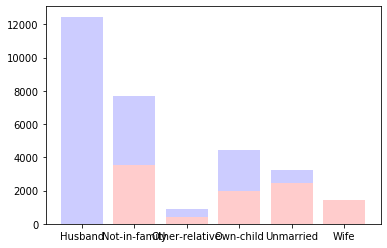

In [93]:
plt.bar(twowayct.index.values, twowayct.Female.values, color='#ffcccc')
plt.bar(twowayct.index.values, twowayct.Male.values, color='#ccccff', bottom=twowayct.Female.values)
plt.show()

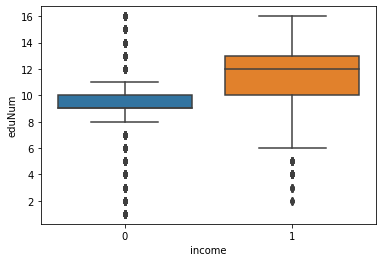

In [95]:
sns.boxplot(x=adult['income'], y=adult['eduNum'])